# Análise Bivariada e Multivariada das features demográficas
As features demográficas incluem informações sobre características pessoais e familiares dos indivíduos. <br>
Features escolhidas: <br>
- sex - sexo do estudante. <br>
- age - idade do estudante. <br>
- address - tipo de endereço residencial (urbano ou rural). <br>
- health - saúde do estudante.
- famsize - tamanho da família (menor ou igual a 3, ou maior que 3). <br>
- Pstatus - status de coabitação dos pais (juntos ou separados). <br>
- Medu - nível de educação da mãe. <br>
- Fedu - nível de educação do pai. <br>
- Mjob - ocupação da mãe. <br>
- Fjob - ocupação do pai. <br>
- guardian - guardião do estudante (mãe, pai ou outro). <br>

### Analisando em relação à G3

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1_trabalhado = pd.read_csv("d1_trabalhado.csv", sep=",")

In [57]:
features_demograficas = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'health',
    'Medu', 'Fedu',
    'Mjob_teacher', 'Mjob_health', 'Mjob_services', 'Mjob_at_home', 'Mjob_other',
    'Fjob_teacher', 'Fjob_health', 'Fjob_services', 'Fjob_at_home', 'Fjob_other',
    'guardian_mother', 'guardian_father', 'guardian_other'
]

d1_features_demograficas = features_demograficas + ['G1', 'G2', 'G3']

In [58]:
# usando correlação de Pearson
correlation_matrix_pearson = d1_trabalhado[d1_features_demograficas].corr()
correlation_with_g3 = correlation_matrix_pearson['G3'].sort_values(ascending=False)

print(correlation_with_g3)

G3                 1.000000
G2                 0.904868
G1                 0.801468
Medu               0.217147
Fedu               0.152457
Mjob_health        0.116158
address            0.105756
Fjob_teacher       0.095374
Mjob_services      0.078429
Mjob_teacher       0.057712
Fjob_health        0.057111
guardian_father    0.032493
guardian_mother    0.022338
Fjob_at_home      -0.013385
Fjob_services     -0.016108
Fjob_other        -0.053483
Pstatus           -0.058009
health            -0.061335
famsize           -0.081407
guardian_other    -0.087774
Mjob_other        -0.096477
sex               -0.103456
Mjob_at_home      -0.115634
age               -0.161579
Name: G3, dtype: float64


In [59]:
# usando correlação de Spearman
correlation_matrix_spearman = d1_trabalhado[d1_features_demograficas].corr(method='spearman')
correlation_with_g3_spearman = correlation_matrix_spearman['G3'].sort_values(ascending=False)

print(correlation_with_g3_spearman)

G3                 1.000000
G2                 0.957125
G1                 0.878001
Medu               0.225036
Fedu               0.170049
Mjob_health        0.132115
address            0.119457
Fjob_teacher       0.117794
Mjob_services      0.086252
Mjob_teacher       0.041701
guardian_father    0.038936
Fjob_health        0.035761
guardian_mother    0.021016
Fjob_at_home      -0.000153
Fjob_services     -0.019121
Pstatus           -0.044262
health            -0.047790
Fjob_other        -0.059396
famsize           -0.066279
guardian_other    -0.095440
Mjob_other        -0.100843
sex               -0.103151
Mjob_at_home      -0.116059
age               -0.173438
Name: G3, dtype: float64


> As features que mais aparecem relevantes são: <br>
G1, G2, Medu, Fedu, age <br>
Isso indica, preliminarmente, que quanto mais a educação e formação dos pais é alta, e, quanto mais novo o estudante é, mais ele tende a ir bem em G3. <br>
Sobre G1 e G2, podemos fazer uma análise focada no desempenho dos estudantes nessas notas, uma vez que elas influenciam bastante o target (G3). Podemos encarar G1 e G2 como 'sub-targets"

### G1

In [60]:
correlation_with_g1 = correlation_matrix_pearson['G1'].sort_values(ascending=False)
print(correlation_with_g1)

G1                 1.000000
G2                 0.852118
G3                 0.801468
Medu               0.205341
Fedu               0.190270
Fjob_teacher       0.168782
Mjob_health        0.120074
Mjob_services      0.085906
Mjob_teacher       0.078294
address            0.069704
Fjob_at_home       0.055115
Fjob_health        0.035303
guardian_father    0.033142
guardian_mother   -0.011767
Fjob_services     -0.015093
Pstatus           -0.016868
guardian_other    -0.031022
Mjob_at_home      -0.057039
age               -0.064081
famsize           -0.071445
health            -0.073172
sex               -0.091839
Fjob_other        -0.113924
Mjob_other        -0.164421
Name: G1, dtype: float64


In [61]:
correlation_with_g1_spearman = correlation_matrix_spearman['G1'].sort_values(ascending=False)
print(correlation_with_g1_spearman)

G1                 1.000000
G2                 0.894792
G3                 0.878001
Medu               0.209662
Fedu               0.194737
Fjob_teacher       0.151141
Mjob_health        0.124098
Mjob_services      0.082577
address            0.074995
Mjob_teacher       0.073338
Fjob_at_home       0.051698
Fjob_health        0.042219
guardian_father    0.034862
Fjob_services     -0.008257
guardian_mother   -0.015680
Pstatus           -0.021450
guardian_other    -0.027041
health            -0.052224
age               -0.057630
Mjob_at_home      -0.061471
famsize           -0.071872
sex               -0.094935
Fjob_other        -0.112246
Mjob_other        -0.156767
Name: G1, dtype: float64


> Features que sobressaem:
- Correlação positiva:
Medu, Fedu, Fjob_teatcher
- Correlação negativa: 
Mjob_other

### G2

In [62]:
correlation_with_g2 = correlation_matrix_pearson['G2'].sort_values(ascending=False)
print(correlation_with_g2)

G2                 1.000000
G3                 0.904868
G1                 0.852118
Medu               0.215527
Fedu               0.164893
Mjob_health        0.133893
address            0.126037
Fjob_teacher       0.096364
Mjob_services      0.078995
guardian_father    0.063859
Mjob_teacher       0.056343
Fjob_health        0.039259
Fjob_services      0.028117
Fjob_at_home      -0.007003
guardian_mother   -0.014442
Pstatus           -0.041382
guardian_other    -0.073712
famsize           -0.081223
Fjob_other        -0.089285
sex               -0.091099
health            -0.097720
Mjob_other        -0.106426
Mjob_at_home      -0.115555
age               -0.143474
Name: G2, dtype: float64


In [63]:
correlation_with_g2_spearman = correlation_matrix_spearman['G2'].sort_values(ascending=False)
print(correlation_with_g2_spearman)

G2                 1.000000
G3                 0.957125
G1                 0.894792
Medu               0.236354
Fedu               0.194844
Mjob_health        0.135864
address            0.127389
Fjob_teacher       0.112900
Mjob_services      0.084001
guardian_father    0.060691
Mjob_teacher       0.042952
Fjob_health        0.036662
Fjob_at_home       0.019470
Fjob_services      0.010712
guardian_mother   -0.007358
Pstatus           -0.029161
health            -0.050900
famsize           -0.075244
guardian_other    -0.080838
Fjob_other        -0.092806
sex               -0.099314
Mjob_other        -0.100475
Mjob_at_home      -0.117975
age               -0.167622
Name: G2, dtype: float64


> Features que sobressaem:
Medu, Fedu, age

### Conclusão:
Medu, Fedu, age, Fjob_teatcher, Mjob_other parecem influenciar mais em G3. Há uma correlação positiva em relação à Medu, Fedu e Fjob_teacher. E uma correlação negativa em relação à Mjob_other e age. <br>
Fjob_teatcher e Mjob_other são features mais significativas em G1, enquanto age é mais significativa em G2 e G3; isso pode indicar que alunos mais novos, que podem não ter sido retidos, tendem a ter um desempenho melhor. Em contraste, fatores como a ocupação dos pais têm uma influência mais notável em G1, indicando que a adaptação inicial ao ambiente escolar pode ser mais afetada por essas variáveis.

### Analisando as features mais relevantes

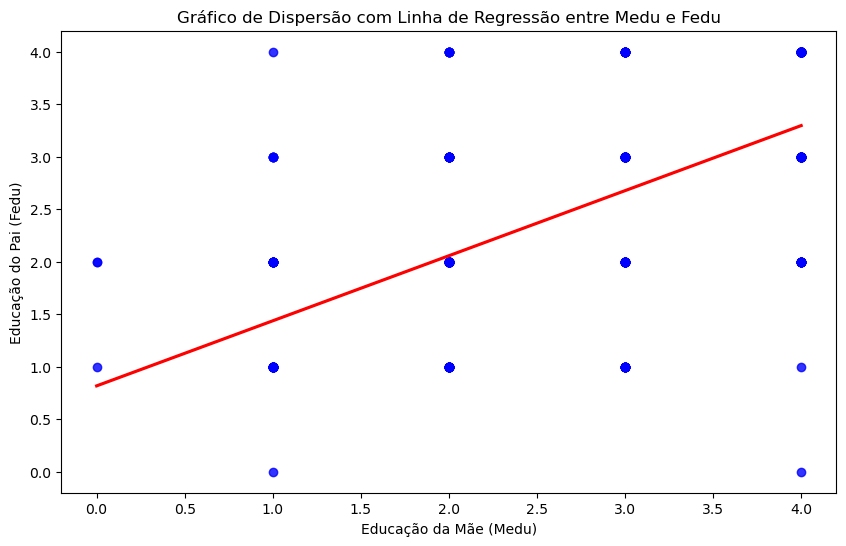

In [52]:
plt.figure(figsize=(10, 6))

sns.regplot(x='Medu', y='Fedu', data=d1_trabalhado, ci=None, color='blue', line_kws={'color': 'red'})

plt.title('Gráfico de Dispersão com Linha de Regressão entre Medu e Fedu')
plt.xlabel('Educação da Mãe (Medu)')
plt.ylabel('Educação do Pai (Fedu)')
plt.show()

- Educação dos pais tendem a ser maiores conjuntamente.

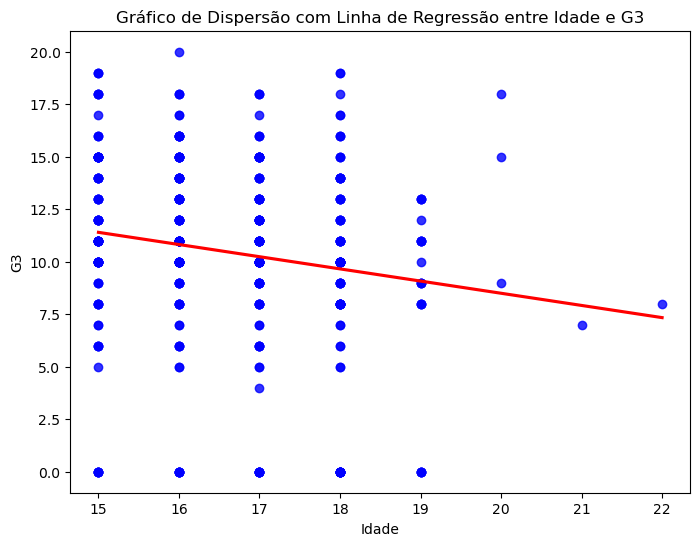

In [54]:
plt.figure(figsize=(8, 6))

sns.regplot(x='age', y='G3', data=d1_trabalhado, ci=None, color='blue', line_kws={'color': 'red'})

plt.title('Gráfico de Dispersão com Linha de Regressão entre Idade e G3')
plt.xlabel('Idade')
plt.ylabel('G3')
plt.show()

- Quanto mais a idade cresce, menor é o rendimento em G3. 